# Predicting the mobile price range indicating how high the price is

We're going to the following aprroach:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experiment

# 1. Problem Defination:

In a statement,
Given between the relationship between various features of a mobile phone (eg- RAM , Internal memeory etc) and its selling price
classifying the price range

# 2. Data:
The dataset came from kaggle machine learning dataset: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

# 3. Evaluation:
If we can predict above 95% accuracy at predicting the price range 

# 4. Features: 
There are 20 features in predicting the price range of the mobiles.


1. battery_power

Total energy a battery can store in one time measured in mAh

2. blue

Has bluetooth or not

3. clock_speed

speed at which microprocessor executes instructions

4. dual_sim

Has dual sim support or not

5. fc

Front Camera mega pixels

6. four_g

Has 4G or not

7. int_memory

Internal Memory in Gigabytes

8. m_dep

Mobile Depth in cm

9. mobile_wt

Weight of mobile phone

10. n_cores

Number of cores of processor

11. pc

Primary Camera mega pixels

12. px_height

Pixel Resolution Height

13. px_width

Pixel Resolution Width

14. ram

Random Access Memory in Megabytes

15. sc_h

Screen Height of mobile in cm

16. sc_w

Screen Width of mobile in cm

17. talk_time

longest time that a single battery charge will last when you are

18. three_g

Has 3G or not

19. touch_screen

Has touch screen or not

20. wifi

Has wifi or not

## Preparing the tools

Pandas , numpy , matplotlib are going to be used for data analysis and data manipulation


In [1]:
# We have to import all the tool we need 

# Regular EDA (Explorotary Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plot to appear inside the notebook, so we
%matplotlib inline

# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Model Evalaution
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve




In [2]:
# Load the data 
df = pd.read_csv("data/train.csv", 
                   low_memory=False)
df.shape # (rows,cols)

(2000, 21)

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Exploration (explaratory data analysis or EDA)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
df.touch_screen

0       0
1       1
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: touch_screen, Length: 2000, dtype: int64

In [7]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

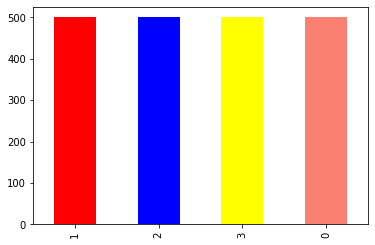

In [8]:
df.price_range.value_counts().plot(kind="bar",color = ["red","blue","yellow","salmon"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
# To check any missing values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
len(df)

2000

In [13]:
df.touch_screen.value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [14]:
pd.crosstab(df.price_range,df.touch_screen)

touch_screen,0,1
price_range,,
0,238,262
1,239,261
2,265,235
3,252,248


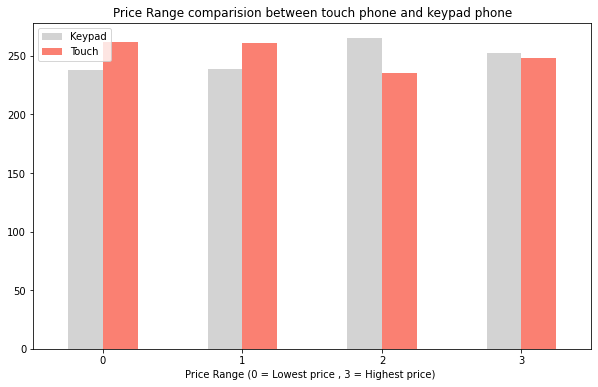

In [15]:
# Creating the plotting of crosstab
pd.crosstab(df.price_range,df.touch_screen).plot(kind="bar",figsize=(10,6),
                                                   color = ["lightgray","salmon"]);
plt.title("Price Range comparision between touch phone and keypad phone")
plt.xlabel("Price Range (0 = Lowest price , 3 = Highest price) ")
plt.legend(["Keypad","Touch"])
plt.xticks(rotation = 0)
plt.yticks(rotation = 0);

In [16]:
df.wifi.value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [17]:
pd.crosstab(df.price_range,df.wifi)

wifi,0,1
price_range,,
0,252,248
1,248,252
2,248,252
3,238,262


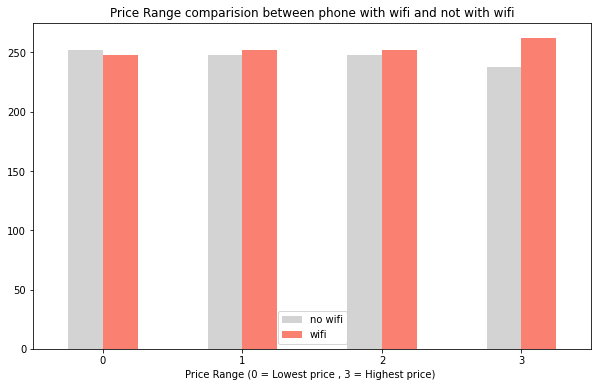

In [18]:
# Creating the plotting of crosstab
pd.crosstab(df.price_range,df.wifi).plot(kind="bar",figsize=(10,6),
                                                   color = ["lightgray","salmon"]);
plt.title("Price Range comparision between phone with wifi and not with wifi")
plt.xlabel("Price Range (0 = Lowest price , 3 = Highest price) ")
plt.legend(["no wifi","wifi"])
plt.xticks(rotation = 0)
plt.yticks(rotation = 0);

In [19]:
df.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [20]:
pd.crosstab(df.price_range,df.dual_sim)

dual_sim,0,1
price_range,,
0,250,250
1,245,255
2,251,249
3,235,265


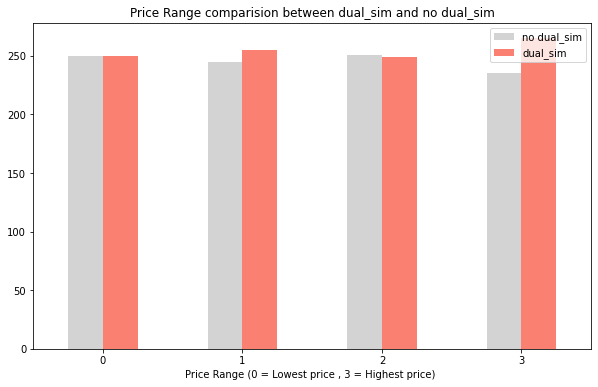

In [21]:
# Creating the plotting of crosstab
pd.crosstab(df.price_range,df.dual_sim).plot(kind="bar",figsize=(10,6),
                                                   color = ["lightgray","salmon"]);
plt.title("Price Range comparision between dual_sim and no dual_sim")
plt.xlabel("Price Range (0 = Lowest price , 3 = Highest price) ")
plt.legend(["no dual_sim","dual_sim"])
plt.xticks(rotation = 0)
plt.yticks(rotation = 0);

In [22]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


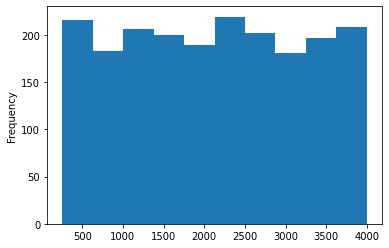

In [23]:
df.ram.plot.hist();

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0, 0.5, '<------Clock Speed------>')

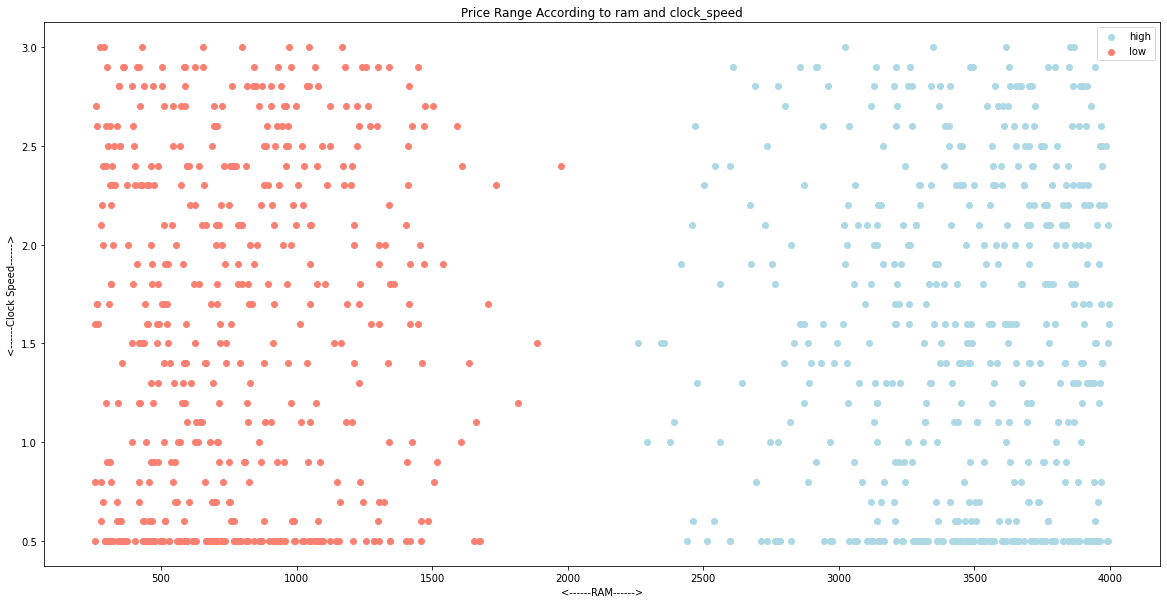

In [25]:
## Ram vs Clock speed for price comparision

plt.figure(figsize = (20,10))


# Scatter
# plt.scatter(df.ram[df.price_range == 1],
#              df.clock_speed[df.price_range == 1],
#              color = "yellow");
        
# plt.scatter(df.ram[df.price_range == 2],
#              df.clock_speed[df.price_range == 2],
#              color = "blue");
            
plt.scatter(df.ram[df.price_range == 3],
             df.clock_speed[df.price_range == 3],
             color = "lightblue");
            
plt.scatter(df.ram[df.price_range == 0],
             df.clock_speed[df.price_range == 0],
             color = "salmon");
        
# Adding useful info
plt.title("Price Range According to ram and clock_speed")
plt.legend(["high","low"])
plt.xlabel("<------RAM------>")
plt.ylabel("<------Clock Speed------>")

        

### Corelational matrix

In [26]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


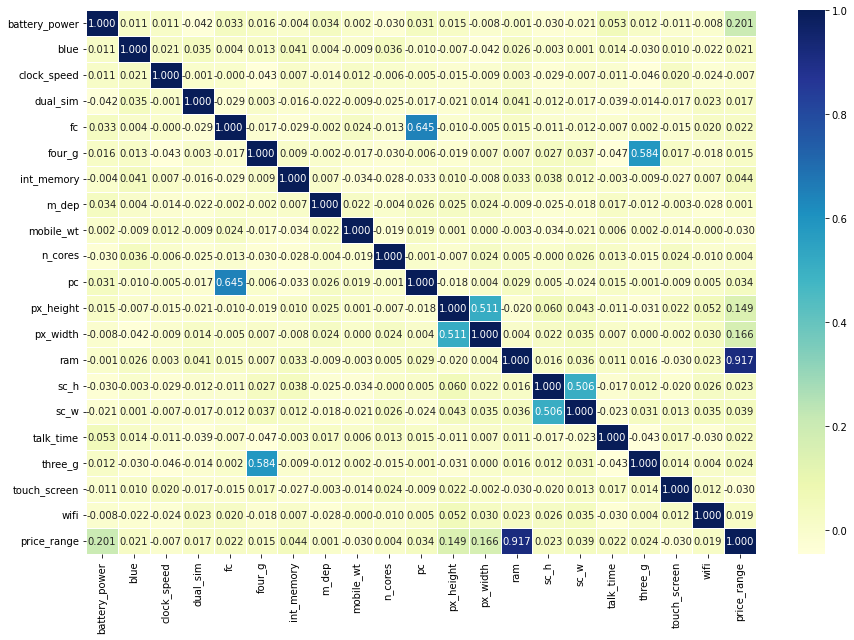

In [27]:
# Editing the corelational matrix (using seaborn heat map)

corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix, 
                  annot = True,  
                  linewidths = 0.5, 
                  fmt = ".3f",
                  cmap = "YlGnBu"
                 )
# bottom , top = ax.get_ylim()
# ax.set_ylim(bottom+0.5 , top-0.5); 

## Modelling

In [28]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [29]:
# Splitting the data into X and y
X = df.drop("price_range",axis=1)
y = df["price_range"]


In [30]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [31]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [32]:
# Splitting into training data and testing data sets
np.random.seed(42)

# Split into train and test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [33]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1923,0,0.5,1,7,0,46,0.5,191,1,10,767,1759,1489,10,9,3,1,1,1
240,633,1,2.2,0,0,1,49,0.1,139,8,1,529,1009,3560,11,1,16,1,1,1
819,1236,0,0.9,1,2,1,57,0.1,188,1,14,517,809,1406,14,12,20,1,0,1
692,781,0,1.1,0,2,0,38,0.4,198,5,7,304,1674,3508,13,8,5,0,0,1
420,1456,1,0.5,1,7,0,7,0.4,105,5,12,823,1104,1587,6,5,20,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1975,1,1.9,1,2,0,31,0.9,151,1,17,775,1607,3022,13,5,19,0,0,1
1294,589,1,0.5,0,1,1,59,0.7,146,8,4,759,1858,362,16,10,6,1,1,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1


In [34]:
y_train,len(y_train)

(968     1
 240     2
 819     0
 692     3
 420     1
        ..
 1130    3
 1294    0
 860     2
 1459    3
 1126    1
 Name: price_range, Length: 1600, dtype: int64,
 1600)

Now we've got our data into train and test sets,it's time to build a machine learning model.

We'll train it(find the patterns) on the training set.

And we'll test it(use the pattern) on the test set.

We're going to use 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours classification
3. Random Forest Classifier

In [35]:
# Put the models inside a dictionary
models = {"Logistic Regression":LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}



In [36]:
# Create a function to fit and score a model

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and Evaluates given machine learning models:
    Args:
    models: a dict of different sk-learn models
    X_train: training data (no labels)
    X_test: testing data(no lables)
    y_train: traning lables
    y_test: testing lables
    """
    # Set the random seed
    np.random.seed(42)

    # MAke a dictionary to keep the model score 
    model_scores = {}

    for name,model in models.items():

        # fit the model to training data sets
        model.fit(X_train,y_train)

        # Evaluate each model and appen its score the model_scores
        model_scores[name] = model.score(X_test,y_test)

    return model_scores

In [37]:
model_scores = fit_and_score(models = models,
                              X_train = X_train,
                              X_test = X_test,
                              y_train = y_train,
                              y_test = y_test)
model_scores

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.6325, 'KNN': 0.9425, 'Random Forest': 0.8925}

In [38]:
model_compare = pd.DataFrame(model_scores,index = ["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.6325,0.9425,0.8925


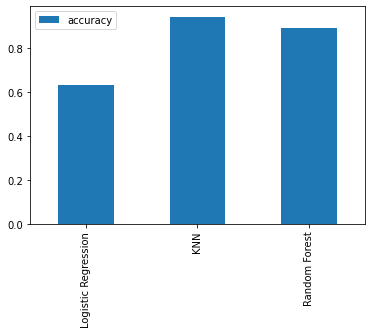

In [39]:
model_compare.T.plot.bar();

* We get to know that KNN and Random Forest performs better
* Now we need to tune the hyperparameters for the model to perform better

In [40]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
# Creating a hyper parameter grid for KNN
knn_grid = {"n_neighbors":np.arange(2,10,2),
             "metric":["chebyshev","euclidean"],
             "n_jobs":[-1]}

In [43]:
# Tune KNN
np.random.seed(42)

# Set up random hyperparameter search for KNN using randomized_search_cv
rs_knn = RandomizedSearchCV(KNeighborsClassifier(), 
                              param_distributions = knn_grid,
                              cv=5,
                              n_iter = 50,
                              verbose = True)

# Fit the tuned model
rs_knn.fit(X_train,y_train)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50,
                   param_distributions={'metric': ['chebyshev', 'euclidean'],
                                        'n_jobs': [-1],
                                        'n_neighbors': array([2, 4, 6, 8])},
                   verbose=True)

In [44]:
# usign grid search cv
gs_knn = GridSearchCV(KNeighborsClassifier(), 
                      param_grid = knn_grid, 
                      cv=5,
                      verbose = True)

gs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['chebyshev', 'euclidean'], 'n_jobs': [-1],
                         'n_neighbors': array([2, 4, 6, 8])},
             verbose=True)

In [45]:
rs_knn.best_params_

{'n_neighbors': 8, 'n_jobs': -1, 'metric': 'euclidean'}

In [46]:
gs_knn.best_params_

{'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 8}

In [47]:
# evaluate
rs_knn.score(X_test,y_test),gs_knn.score(X_test,y_test)

(0.94, 0.94)

In [48]:
# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":range(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [49]:
# By randomized search cv
# Let's set up the random seed
np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter=20,
                          verbose=True)

# Fitting
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': range(10, 1000, 50)},
                   verbose=True)

In [50]:
rs_rf.best_params_


{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [51]:
rs_rf.score(X_test,y_test)

0.89

We get that the KNN still perfoms better, so we would proceed with KNN

## Evaluating our tuned ml classifier 

* Confusion matrix
* Classification matrix
* Precision
* Recall
* F1 score

In [52]:
# make prediction with tuned model
y_preds = rs_knn.predict(X_test)

In [53]:
y_preds

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 2, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 2, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 2, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 1, 3, 0, 1, 3, 2, 2, 2, 1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [54]:
y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64

In [55]:
print(confusion_matrix(y_test,y_preds))

[[105   0   0   0]
 [  3  87   1   0]
 [  0   9  83   0]
 [  0   0  11 101]]


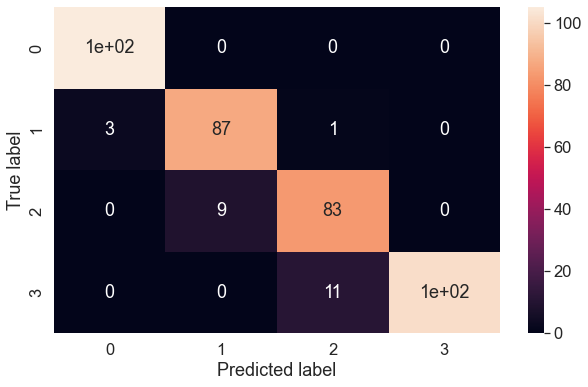

In [56]:
# Plot the confusion matrix
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    This function plot the confusion matrix using seaborn's heatmap().

    """
    fig , ax = plt.subplots(figsize = (10,6))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True, 
                     cbar=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test,y_preds)

In [57]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.91      0.96      0.93        91
           2       0.87      0.90      0.89        92
           3       1.00      0.90      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



## Calculation the evalaution matrix using cross validation

In [58]:
rs_knn.best_params_

{'n_neighbors': 8, 'n_jobs': -1, 'metric': 'euclidean'}

In [59]:
clf = KNeighborsClassifier(n_neighbors = 8 , n_jobs = -1,metric= "euclidean")

In [60]:
# Function to evaluate our cross validation matrix

def cross_val_mat(clf,X,y):
    """
    This function evaluates the cross validation matrix of a model

     """
    #metric={}
    cv_acc = cross_val_score(clf,X,y,cv=5,scoring = "accuracy")
    metric={"Accuracy": np.mean(cv_acc)}

    cv_prec = cross_val_score(clf,X,y,cv=5,scoring = "precision_macro")
    metric["Precision"]= np.mean(cv_prec)
    
    cv_recall = cross_val_score(clf,X,y,cv=5,scoring = "recall_macro")
    metric["Recall"]= np.mean(cv_recall)

    cv_f1 = cross_val_score(clf,X,y,cv=5,scoring = "f1_macro")
    metric["F1_Score"]= np.mean(cv_f1)

    return metric


    

In [61]:
cross_val_mat(clf,X,y)

{'Accuracy': 0.9245000000000001,
 'Precision': 0.9256395414619998,
 'Recall': 0.9244999999999999,
 'F1_Score': 0.9244572571399227}

In [62]:
cross_val_score(clf,X,y,cv=5,scoring="accuracy")

array([0.935 , 0.9325, 0.93  , 0.92  , 0.905 ])

In [63]:
cross_val_score(clf,X,y,cv=5,scoring="f1_macro")

array([0.93516937, 0.93277895, 0.92997524, 0.91980837, 0.90455435])

In [64]:
# Visualize our cross validate matrix
cv_metrics = pd.DataFrame(cross_val_mat(clf,X,y),
                         index=["PERFOMANCE"])

In [65]:
cv_metrics

,Accuracy,Precision,Recall,F1_Score
PERFOMANCE,0.9245,0.92564,0.9245,0.924457


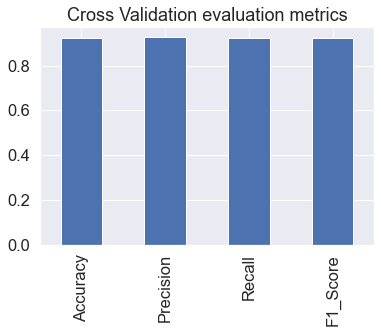

In [66]:
cv_metrics.T.plot.bar(title="Cross Validation evaluation metrics",legend=False);

In [80]:
test = pd.read_csv("data/test.csv")
test1 = test.drop("id",axis = 1)

In [81]:
test1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [73]:
y_preds = clf.fit(X_test,y_test)

In [84]:
predictions = clf.predict(test1)

In [89]:
predictions

array([3, 3, 3, 3, 1, 3, 3, 1, 2, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 0, 3, 1, 0, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 3, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1,

In [95]:
predictions[4:7:2]

array([1, 3], dtype=int64)

In [97]:
df_preds =pd.DataFrame()
df_preds["id"] = test["id"]
df_preds["price_range"] = predictions

In [98]:
df_preds

,id,price_range
0,1,3
1,2,3
2,3,3
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2


In [99]:
df_preds.to_csv("data/test_prediction.csv",index=False)